In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df = pd.read_csv("Ds_Data (1).csv")
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.shape

(12684, 25)

In [4]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [5]:
df.duplicated().sum()

291

In [6]:
df.drop(['car'],axis=1,inplace=True)

In [7]:
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)

In [8]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [9]:
numeric_categorical_features = df.select_dtypes(include=['int','float']).columns
df_numeric_categorical = df[numeric_categorical_features]
df_numeric_categorical.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Accept(Y/N?),0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


##### direction-same and dirction-opp having both having perfectly correlated so both have same variance
##### -toconpons_geq5min features has no correlation with any feature becasue it has the same value 1 for all data points,which means all the restaturants/bar are least more than five mins away from the driver
##### so drop both driection_opp and tocoupons_GEQ5min features

In [11]:
df.drop(['direction_opp','toCoupon_GEQ5min'],axis=1,inplace=True)

In [12]:
df = df.rename(columns={'Accept(Y/N?)': 'Y'})
print(df)

           destination  passanger weather  temperature                 coupon  \
0      No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2      No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
...                ...        ...     ...          ...                    ...   
12679             Home    Partner   Rainy           55  Carry out & Take away   
12680             Work      Alone   Rainy           55  Carry out & Take away   
12681             Work      Alone   Snowy           30           Coffee House   
12682             Work      Alone   Snowy           30                    Bar   
12683             Work      Alone   Sunny           80      Restaurant(20-50)   

      expiration  gender ag

In [13]:
def percent_value_counts(df, feature):
    data = pd.DataFrame(sorted(list(df[feature].unique())),columns=[feature])
    data['Total_Count'] = list(df.groupby(feature).Y.count())
    data['Total_%'] = round(data['Total_Count']/df[feature].shape[0]*100,3)
    data['Accepted'] = list(df[df.Y==1].groupby(feature).Y.count())
    data['Rejected'] = list(df[df.Y==0].groupby(feature).Y.count())
    data['%Accepted'] = round(data['Accepted']/data['Total_Count']*100,3)
    data['%Rejected'] = round(data['Rejected']/data['Total_Count']*100,3)
    return data

In [14]:
def univariate_analysis(df, feature):
    df_EDA = percent_value_counts(df, feature)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[feature],df_EDA['Total_Count'])
    plt.barh(df_EDA[feature],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(feature+' wise accepted coupons')
    plt.show()

    return df_EDA

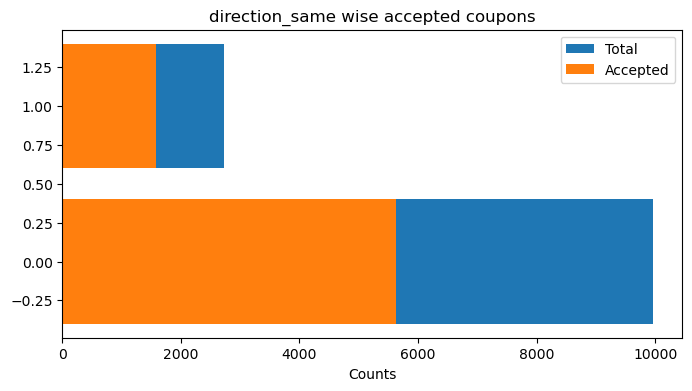

,direction_same,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,0,9960,78.524,5624,4336,56.466,43.534
1,1,2724,21.476,1586,1138,58.223,41.777


In [15]:
univariate_analysis(df,'direction_same')

In [16]:
###  direction_same feature has 79% value is '0', and 21% value is '1'. Both value has almost similar acceptance ratio. so this feature not more usefull. So, we drop 'direction_same' feature.

In [17]:
df.drop(['direction_same'], axis=1, inplace=True)

In [18]:
# Coupon

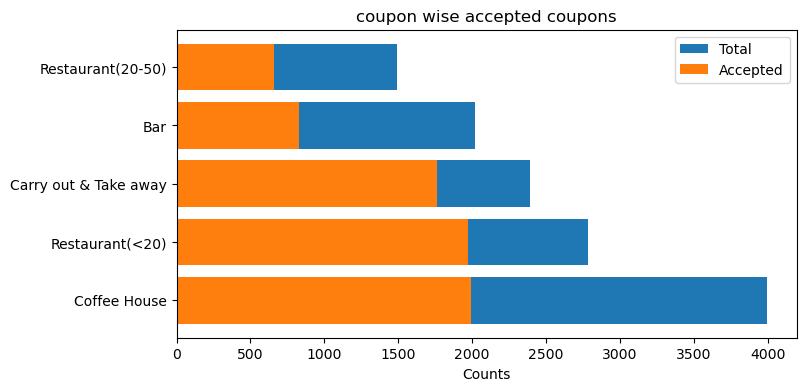

,coupon,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,Coffee House,3996,31.504,1995,2001,49.925,50.075
4,Restaurant(<20),2786,21.965,1970,816,70.711,29.289
1,Carry out & Take away,2393,18.866,1760,633,73.548,26.452
0,Bar,2017,15.902,827,1190,41.001,58.999
3,Restaurant(20-50),1492,11.763,658,834,44.102,55.898


In [19]:
univariate_analysis(df,'coupon')

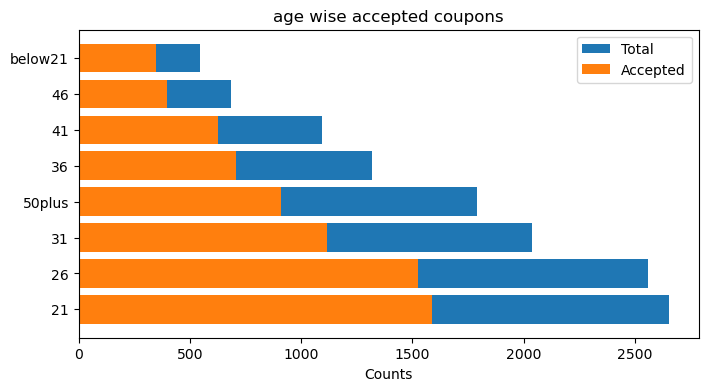

,age,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,21,2653,20.916,1587,1066,59.819,40.181
1,26,2559,20.175,1525,1034,59.594,40.406
2,31,2039,16.075,1114,925,54.635,45.365
6,50plus,1788,14.096,910,878,50.895,49.105
3,36,1319,10.399,706,613,53.525,46.475
4,41,1093,8.617,626,467,57.274,42.726
5,46,686,5.408,395,291,57.580,42.420
7,below21,547,4.313,347,200,63.437,36.563


In [20]:
univariate_analysis(df,'age')

In [21]:
## education

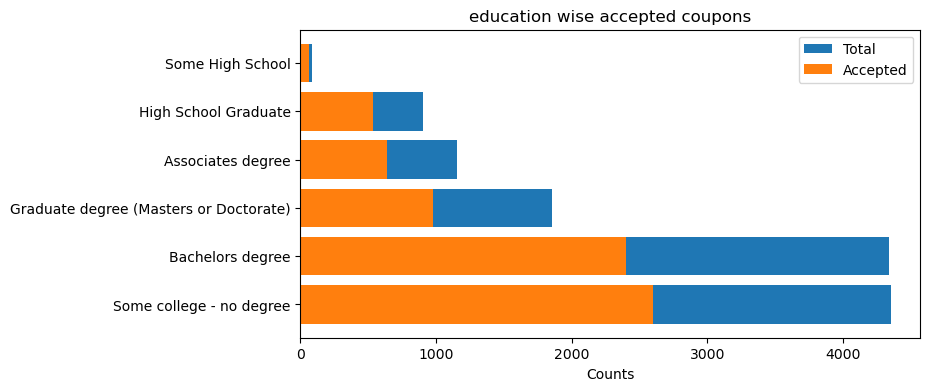

,education,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
5,Some college - no degree,4351,34.303,2595,1756,59.641,40.359
1,Bachelors degree,4335,34.177,2403,1932,55.433,44.567
2,Graduate degree (Masters or Doctorate),1852,14.601,975,877,52.646,47.354
0,Associates degree,1153,9.090,638,515,55.334,44.666
3,High School Graduate,905,7.135,536,369,59.227,40.773
4,Some High School,88,0.694,63,25,71.591,28.409


In [22]:
univariate_analysis(df,'education')

In [23]:
### income

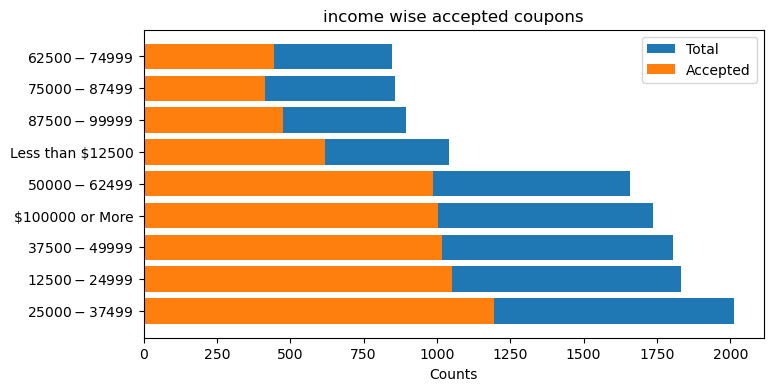

,income,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,$25000 - $37499,2013,15.870,1194,819,59.314,40.686
1,$12500 - $24999,1831,14.436,1052,779,57.455,42.545
3,$37500 - $49999,1805,14.231,1018,787,56.399,43.601
0,$100000 or More,1736,13.687,1004,732,57.834,42.166
4,$50000 - $62499,1659,13.079,988,671,59.554,40.446
8,Less than $12500,1042,8.215,618,424,59.309,40.691
7,$87500 - $99999,895,7.056,476,419,53.184,46.816
6,$75000 - $87499,857,6.757,414,443,48.308,51.692
5,$62500 - $74999,846,6.670,446,400,52.719,47.281


In [24]:
univariate_analysis(df,'income')

In [25]:
### destionation

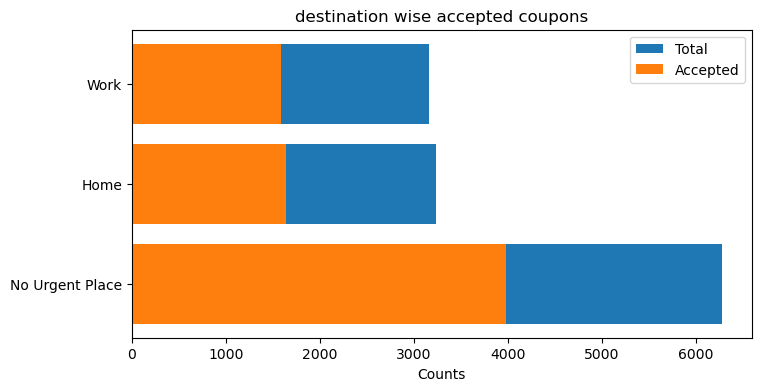

,destination,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,No Urgent Place,6283,49.535,3982,2301,63.377,36.623
0,Home,3237,25.520,1639,1598,50.633,49.367
2,Work,3164,24.945,1589,1575,50.221,49.779


In [26]:
univariate_analysis(df,'destination')

In [27]:
### passanger

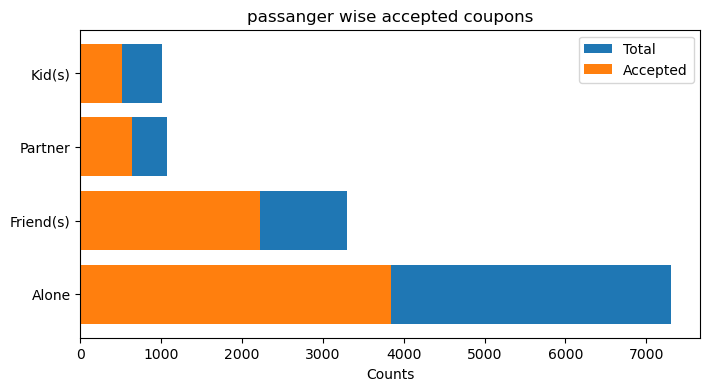

,passanger,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,Alone,7305,57.592,3841,3464,52.580,47.420
1,Friend(s),3298,26.001,2221,1077,67.344,32.656
3,Partner,1075,8.475,640,435,59.535,40.465
2,Kid(s),1006,7.931,508,498,50.497,49.503


In [28]:
univariate_analysis(df,'passanger')

In [29]:
### weather

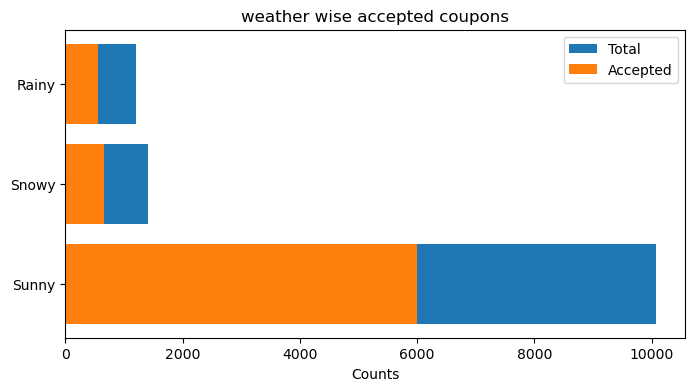

,weather,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,Sunny,10069,79.383,5989,4080,59.480,40.520
1,Snowy,1405,11.077,661,744,47.046,52.954
0,Rainy,1210,9.540,560,650,46.281,53.719


In [30]:
univariate_analysis(df,'weather')

In [31]:
### Temperature

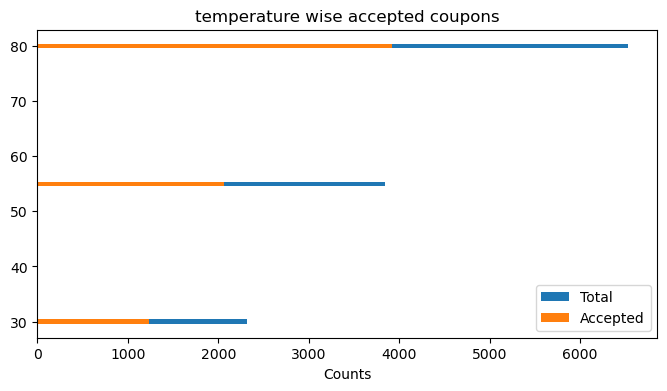

,temperature,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,80,6528,51.466,3919,2609,60.034,39.966
1,55,3840,30.274,2061,1779,53.672,46.328
0,30,2316,18.259,1230,1086,53.109,46.891


In [32]:
univariate_analysis(df,'temperature')

In [33]:
### gender

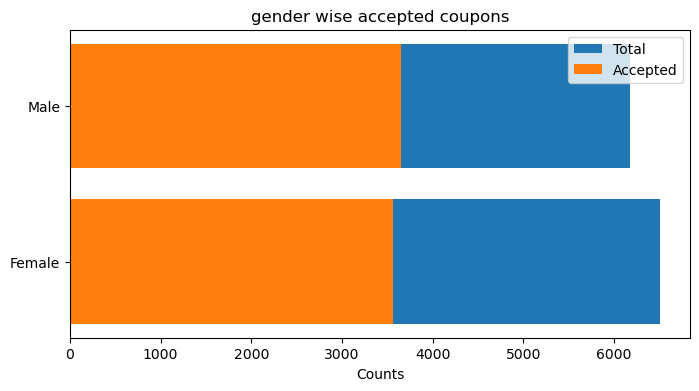

,gender,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,Female,6511,51.332,3563,2948,54.723,45.277
1,Male,6173,48.668,3647,2526,59.080,40.920


In [34]:
univariate_analysis(df,'gender')

In [35]:
### Maritalstatus

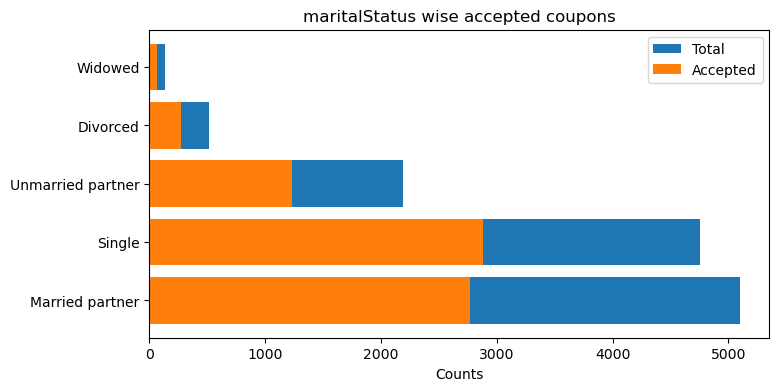

,maritalStatus,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,Married partner,5100,40.208,2769,2331,54.294,45.706
2,Single,4752,37.465,2879,1873,60.585,39.415
3,Unmarried partner,2186,17.234,1227,959,56.130,43.870
0,Divorced,516,4.068,273,243,52.907,47.093
4,Widowed,130,1.025,62,68,47.692,52.308


In [36]:
univariate_analysis(df,'maritalStatus')

#### Feature Engineering##### 
to_Coupo
##### 
‘toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ features tell the driving distance to the restaurant/coffee house/bar, so we can combine them an           d make a new feature called ‘to_coupon
##### .
‘toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ features have two categorical values 0 & 1 and ‘to_coupon’ has three categorical value 0,1 &
##### 0.
0: driving distance is less than or equal to 15 ##### min
1: driving distance is greater than 15 min and less than or equal to 25#####  min
2: driving distance is greater than 25 min

In [38]:
df['to_Coupon'] = 2
df.loc[df['toCoupon_GEQ15min'] == 0, 'to_Coupon'] = 0
df.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 0), 'to_Coupon'] = 1

print('Unique values:', df['to_Coupon'].unique())
print('-' * 50)

print(df['to_Coupon'].describe())

Unique values: [0 1 2]
--------------------------------------------------
count    12684.000000
mean         0.680621
std          0.675029
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: to_Coupon, dtype: float64


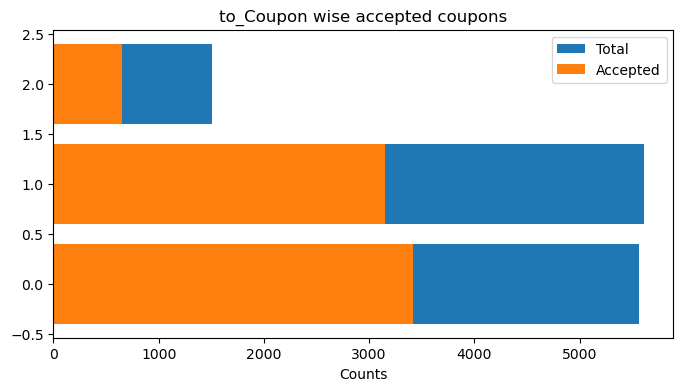

,to_Coupon,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,1,5611,44.237,3146,2465,56.068,43.932
0,0,5562,43.851,3416,2146,61.417,38.583
2,2,1511,11.913,648,863,42.886,57.114


In [39]:
univariate_analysis(df,'to_Coupon')

#### We can see that most coupons offered are nearby within 25 minutes. Also, users generally accept coupons that are less than 25 minutes distance.

In [41]:
df.drop(['toCoupon_GEQ15min','toCoupon_GEQ25min'], axis=1, inplace=True)

In [42]:
### coupon feq

In [43]:
coupon_map = {
    'Restaurant(<20)': 'RestaurantLessThan20',
    'Coffee House': 'CoffeeHouse',
    'Carry out & Take away': 'CarryAway',
    'Bar': 'Bar',
    'Restaurant(20-50)': 'Restaurant20To50'
}
df['coupon_freq'] = df['coupon'].map(coupon_map)
df['coupon_freq'] = df.apply(lambda row: row[row['coupon_freq']], axis=1)
# Print unique values
print('Unique values:', df['coupon_freq'].unique())
print('-' * 50)
print(df['coupon_freq'].describe())

Unique values: ['4~8' 'never' '1~3' 'less1' 'gt8']
--------------------------------------------------
count     12684
unique        5
top         1~3
freq       3892
Name: coupon_freq, dtype: object


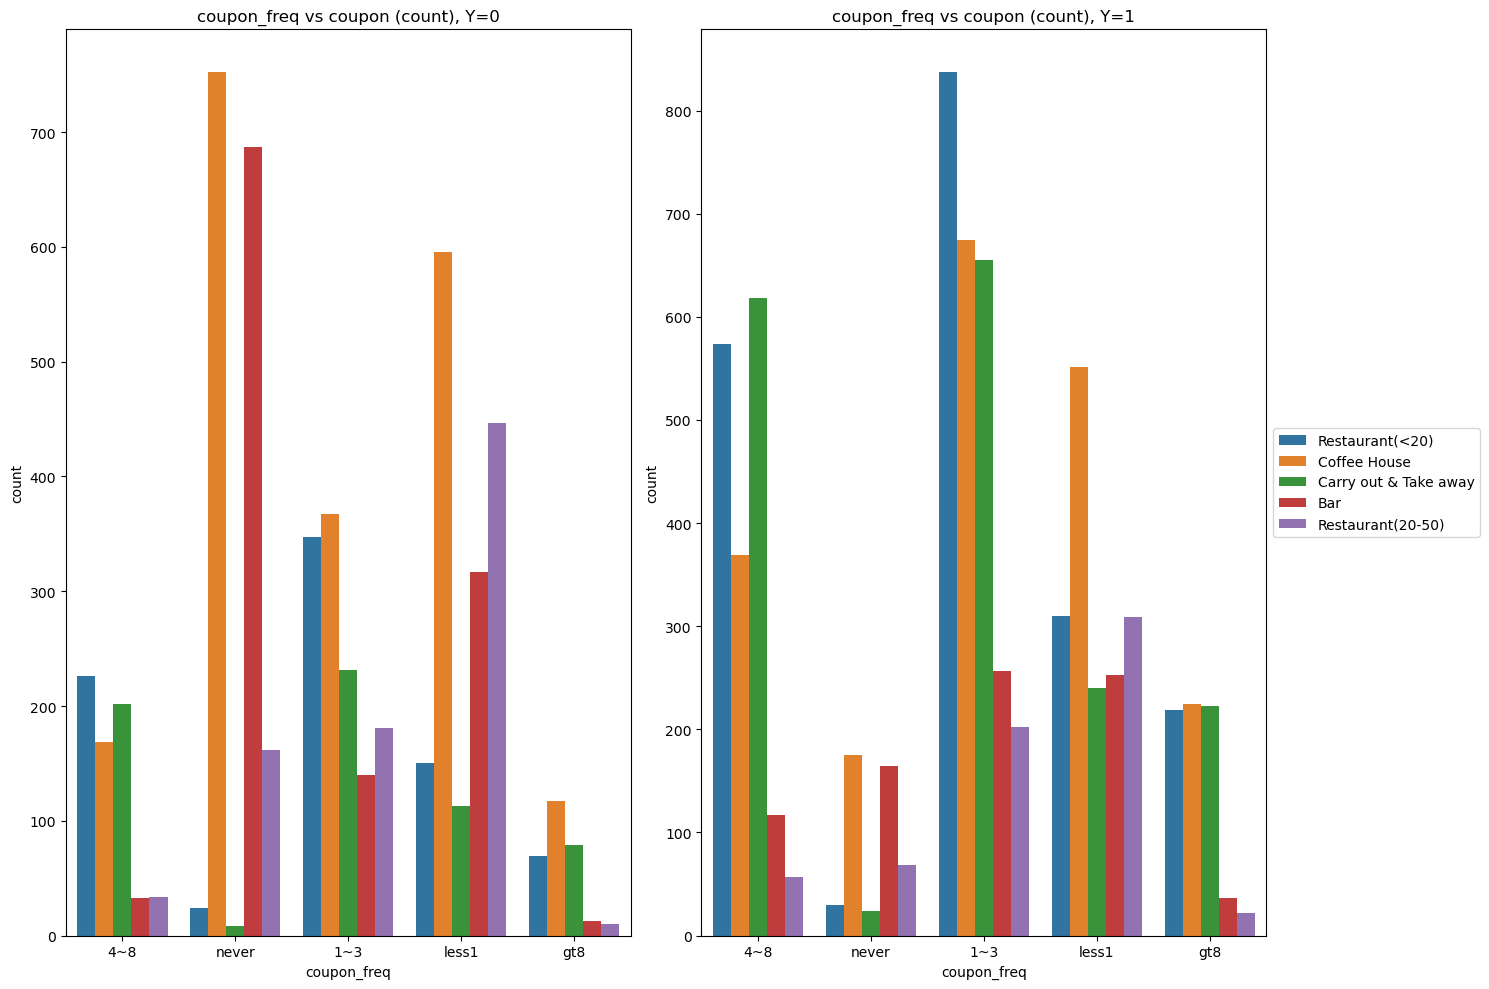

In [44]:
coupon_order = df['coupon'].unique()
coupon_freq_order = df['coupon_freq'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=coupon_freq_order, hue_order=coupon_order)
axes[0].set_title('coupon_freq vs coupon (count), Y=0')
axes[0].legend().remove()

sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=coupon_freq_order, hue_order=coupon_order)
axes[1].set_title('coupon_freq vs coupon (count), Y=1')

axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.tight_layout()
plt.show()

In [45]:
##### Most users in this data have visited more than one time Restaurant(<$20) and Carry Away services and also they have the highest coupon acceptance ratio.
##### Users who visited Coffee House 1to3 times and 4to8 times have also higher coupon acceptance ratio.
##### Most users visited an expensive Restaurant only once and users who visited an expensive Restaurant greater than 4 times have the highest coupon acceptance ratio for an expensive Restaurant.
##### Most users in this data never visit a Bar and most of them reject the bar coupon and users who visited Bar 1to3 times or 4to8 times have a higher coupon acceptance ratio.

In [46]:
df.drop(['RestaurantLessThan20','CoffeeHouse', 'CarryAway', 'Bar', 'Restaurant20To50'], axis=1, inplace=True)

In [47]:
occupation_acceptance_rate = df.groupby("occupation")["Y"].mean()

quintiles = pd.qcut(occupation_acceptance_rate, 5, labels=False)

occupation_class = pd.Series(quintiles, index=occupation_acceptance_rate.index)

df["occupation_class"] = df["occupation"].map(occupation_class)

df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Y,to_Coupon,coupon_freq,occupation_class
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,1,0,4~8,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,never,1
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,1,1,1~3,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,never,1
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,never,1


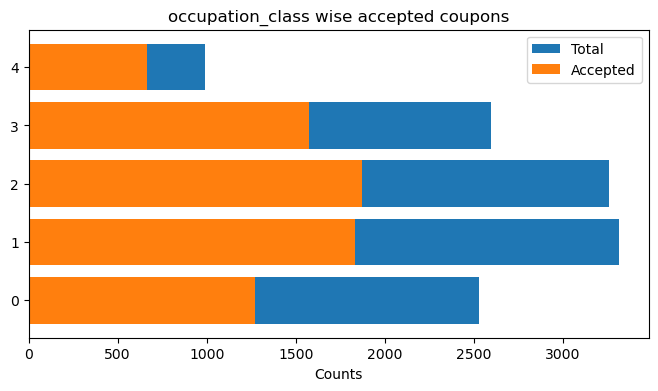

,occupation_class,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,1,3314,26.127,1830,1484,55.220,44.780
2,2,3258,25.686,1873,1385,57.489,42.511
3,3,2595,20.459,1575,1020,60.694,39.306
0,0,2527,19.923,1268,1259,50.178,49.822
4,4,990,7.805,664,326,67.071,32.929


In [48]:
univariate_analysis(df,'occupation_class')

In [49]:
df.drop(['occupation'], axis=1, inplace=True)

In [50]:
from sklearn.preprocessing import OrdinalEncoder

order = [['Work','Home','No Urgent Place'],
         ['Kid(s)','Alone','Partner','Friend(s)'],
         ['Rainy','Snowy','Sunny'],
         [30,55,80],
         ['Bar','Restaurant(20-50)','Coffee House','Restaurant(<20)','Carry out & Take away'],
         ['2h','1d'],
         ['Female','Male'],
         ['below21','21','26','31','36','41','46','50plus'],
         ['Widowed','Divorced','Married partner','Unmarried partner','Single'],
         ['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)'],
         ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'],
         ['never','less1','1~3','4~8','gt8']]
Ordinal_enc = OrdinalEncoder(categories=order)
columns_to_encode = ['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'income', 'coupon_freq']
data_to_encode = df[columns_to_encode]
df_Ordinal_encoding = Ordinal_enc.fit_transform(data_to_encode)
df[columns_to_encode] = df_Ordinal_encoding
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,income,Y,to_Coupon,coupon_freq,occupation_class
0,2.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,3.0,1,2.0,3.0,1,0,3.0,1
1,2.0,3.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,1,2.0,3.0,0,0,0.0,1
2,2.0,3.0,2.0,2.0,4.0,0.0,0.0,1.0,3.0,1,2.0,3.0,1,1,2.0,1
3,2.0,3.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,1,2.0,3.0,0,1,0.0,1
4,2.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,1,2.0,3.0,0,1,0.0,1


In [51]:
# separating our independent and dependent variable

In [52]:
X = df.drop(['Y'], axis = 1)
y = df["Y"]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 20, random_state=0)

In [54]:
df.Y.value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Check for numeric columns only before applying SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE applied successfully!")
print("New class distribution:", pd.Series(y_train_smote).value_counts())

SMOTE applied successfully!
New class distribution: Y
0    7198
1    7198
Name: count, dtype: int64


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.4, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [58]:
rf_model_oversampled = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model_oversampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred = rf_model_oversampled.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2848
           1       0.76      0.77      0.77      2911

    accuracy                           0.76      5759
   macro avg       0.76      0.76      0.76      5759
weighted avg       0.76      0.76      0.76      5759



In [61]:
lg_model_oversampled = LogisticRegression()

# Fit the model to the training data
lg_model_oversampled.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred = lg_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      2848
           1       0.69      0.67      0.68      2911

    accuracy                           0.68      5759
   macro avg       0.68      0.68      0.68      5759
weighted avg       0.68      0.68      0.68      5759



In [63]:
dt_model_oversampled = DecisionTreeClassifier()

# Fit the model to the training data
dt_model_oversampled.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
y_pred = dt_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2848
           1       0.71      0.68      0.69      2911

    accuracy                           0.70      5759
   macro avg       0.70      0.70      0.70      5759
weighted avg       0.70      0.70      0.70      5759



In [65]:
kn_model_oversampled = KNeighborsClassifier()

# Fit the model to the training data
kn_model_oversampled.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred = kn_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2848
           1       0.74      0.69      0.72      2911

    accuracy                           0.73      5759
   macro avg       0.73      0.73      0.72      5759
weighted avg       0.73      0.73      0.72      5759



In [67]:
xg_model_oversampled = XGBClassifier()

# Fit the model to the training data
xg_model_oversampled.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred = xg_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2848
           1       0.77      0.80      0.78      2911

    accuracy                           0.78      5759
   macro avg       0.78      0.78      0.78      5759
weighted avg       0.78      0.78      0.78      5759



### I Achieved an accuracy of 0.78using xgboostclassifier